# Homework 4 (Full mark: 100pt)
- Questions 1~3: Conceptual
- Questions 4~8: Programming

# Conceptual questions

# 1. Decision tree (15pt)

**It is mentioned in Section 8.2.3 that boosting using depth-one trees (or stumps) leads to an additive model: that is, a model of the form**

$f(X)=\sum_{j=1}^{p} f_{j}\left(X_{j}\right)$

**Explain why this is the case. You can begin with (8.12) in Algorithm 8.2 in the textbook**

Let's apply algorithm 8.2 to depth-one trees:
1. Initialization: Set $\hat{f}(x)=0$ and $r_i=y_i$ for all $i$ in the training set
2. Iteration 1: $\hat{f}^1(x)=\frac{1}{\lambda}f_1(x_1)$, $\hat{f}(x)=\lambda\hat{f}^1(x)$ and $r_i=y_i-\lambda\hat{f}^1(x_i)$ for all $i$ in the training set
3. Iteration 2: $\hat{f}^2(x)=\frac{1}{\lambda}f_2(x_2)$, $\hat{f}(x)=\lambda\hat{f}^1(x)+\lambda\hat{f}^2(x)$ and $r_i=y_i-\lambda\hat{f}^1(x_i)-\lambda\hat{f}^2(x_i)$ for all $i$ in the training set. As we can see, $\hat{f}(x)$, i.e $f(X)$, can be represented as a sum of $f_j$:<br />
$f(X)=\sum_{j=1}^{p} f_{j}\left(X_{j}\right)$

# 2. Hyperplanes (8pt)

**We have seen that in $p = 2$ dimensions, a linear decision boundary takes the form $\beta_0+\beta_1X_1+\beta_2X_2 = 0$. We now investigate a non-linear decision boundary.**

**(a) Sketch the curve**: $\left(1+X_{1}\right)^{2}+\left(2-X_{2}\right)^{2}=4$

<img src="figures/sketch1.jpg" width="600"/>

The decision boundary is a circle or radius 2, with center at $X_1=-1$, $X_2=2$

**(b) On your sketch, indicate the set of points for which** $\left(1+X_{1}\right)^{2}+\left(2-X_{2}\right)^{2}>4$ **as well as the set of points for which** $\left(1+X_{1}\right)^{2}+\left(2-X_{2}\right)^{2}\leq4$.

<img src="figures/sketch2.jpg" width="600"/>

Green part of the sketch is $\left(1+X_{1}\right)^{2}+\left(2-X_{2}\right)^{2}>4$, which is all the area outside the decision boundary circle, and yellow part, along with the red contour, is $\left(1+X_{1}\right)^{2}+\left(2-X_{2}\right)^{2}\leq4$, which is the area inside the decision boundary circle

**(c) Suppose that a classifier assigns an observation to the blue class if** $\left(1+X_{1}\right)^{2}+\left(2-X_{2}\right)^{2}>4$**, and to the red class otherwise. To what class is the observation (0, 0) classified? (−1, 1)? (2, 2)? (3, 8)?**

To predict which class will be assigned to a given datapoint, we can just plug in the coordinate value to the curve equation<br />
$(0,0)$: $\left(1+0\right)^{2}+\left(2-0\right)^{2}=5>4$ $\to$ blue class<br />
$(-1,1)$: $\left(1+(-1)\right)^{2}+\left(2-1\right)^{2}=1<4$ $\to$ red class<br />
$(2,2)$: $\left(1+2\right)^{2}+\left(2-2\right)^{2}=9>4$ $\to$ blue class<br />
$(3,8)$: $\left(1+3\right)^{2}+\left(2-8\right)^{2}=52>4$ $\to$ blue class

**(d) Argue that while the decision boundary in (c) is not linear in terms of $X_{1}$ and $X_{2}$, it is linear in terms of $X_{1}, X_{1}^{2}, X_{2}$, and $X_{2}^{2}$**

As the output curve equation is not a linear combination of $X_1$ and $X_2$ but rather of their squares, the decision boundary is not linear in terms of $X_1$ and $X_2$. But if we expand the curve equation, we get $1+2X_1+X_1^2+4-4X_2+X_2^2=4$, which can be further simplified to $1+2X_1+X_1^2-4X_2+X_2^2=0$, which is obviously linear in terms of $X_{1}, X_{1}^{2}, X_{2}$, and $X_{2}^{2}$ as the curve equation is a linear combination of these terms

# 3. Hierarchical clustering (10pt)

**Suppose that for a particular data set, we perform hierarchical clustering using single linkage and using complete linkage. We obtain two dendrograms.**

**(a) At a certain point on the single linkage dendrogram, the clusters $\{1,2,3\}$ and $\{4,5\}$ fuse. On the complete linkage dendrogram, the clusters $\{1,2,3\}$ and $\{4,5\}$ also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?**

There is not enough information to tell, but generally, the fusion with the complete linkage will occur higher as the complete linkage uses highest intra-cluster distance. However, when the inter-cluster distances are equal to each other, both linkages will fuse at the same height

**(b) At a certain point on the single linkage dendrogram, the clusters $\{5\}$ and $\{6\}$ fuse. On the complete linkage dendrogram, the clusers $\{5\}$ and $\{6\}$ also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or s there not enough information to tell?**

As these clusters are single-element clusters, there is only one value for intra-cluster distance, which is both the highest and lowest distance. As such, both linkages will fuse at the same height

# Programming questions

# 5. SVM 1 (10pt)

**Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.**

In [147]:
## Write your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_svc(title, svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title, color='k')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

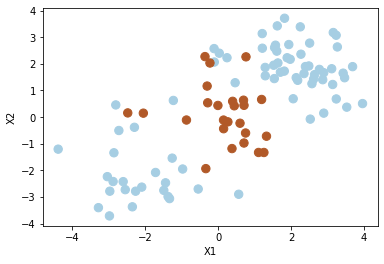

In [148]:
X = np.random.randn(100,2)
X[:50] = X[:50] +2
X[51:75] = X[51:75] -2
y = np.concatenate([np.repeat(-1, 75), np.repeat(1,25)])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

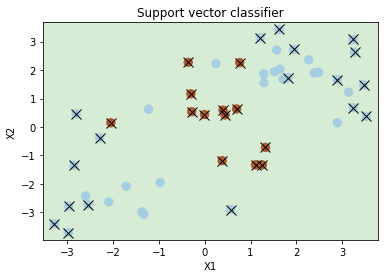

Number of support vectors:  31


In [149]:
# Support Vector Classifier with linear kernel.
svc = SVC(C= 1, kernel='linear')
svc.fit(X_train, y_train)
plot_svc("Support vector classifier", svc, X_train, y_train)

In [150]:
y_pred = svc.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc.classes_, columns=svc.classes_)

,-1,1
-1,38,0
1,12,0


In [151]:
svc.score(X_test, y_test)

0.76

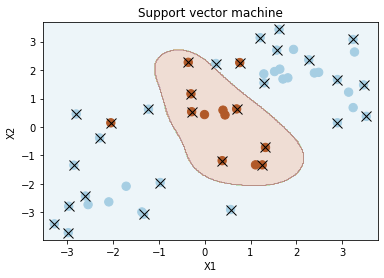

Number of support vectors:  31


In [152]:
svm_radial = SVC(C=1, kernel='rbf', gamma=1)
svm_radial.fit(X_train, y_train)
plot_svc("Support vector machine", svm_radial, X_train, y_train)

In [153]:
y_pred = svm_radial.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svm_radial.classes_, columns=svm_radial.classes_)

,-1,1
-1,36,2
1,3,9


In [154]:
svm_radial.score(X_test, y_test)

0.9

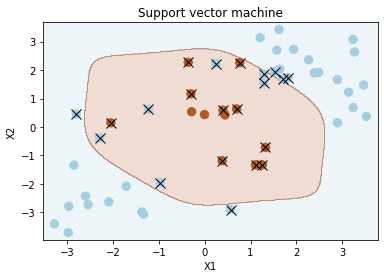

Number of support vectors:  21


In [155]:
svm_poly = SVC(C=10, kernel='poly', degree=10)
svm_poly.fit(X_train, y_train)
plot_svc("Support vector machine", svm_poly, X_train, y_train)

In [156]:
y_pred = svm_poly.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svm_poly.classes_, columns=svm_poly.classes_)

,-1,1
-1,30,8
1,0,12


In [157]:
svm_poly.score(X_test, y_test)

0.84

We can see that the generated datapoints can be easily separated by their classes by a non-linear decision boundary. Using radial kernel, as well as a polynomial kernel with high degree, allows the SVM to build such decision boundaries and separate the datapoints with high accuracy. This is evident by their confusion matrices, which shows high number of true positives and negatives, as well as a low number of false positives and negatives, which allows these SVMs to achieve a high scores - 0.9 for radial kernel and 0.84 for polynomial kernel. However, SVC using simple linear kernel cannot built such decision boundaries, so the optimal solution with the highest score can be achieved by simply assigning the most common class to each datapoint, which leads to a low score of 0.76. 

# 6. SVM 2 (16pt)

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

%matplotlib inline

df = pd.read_csv('data/OJ.csv', index_col=0)
# Define predictors and response 
X = df.drop(axis=1, labels=['Purchase'])
y = df['Purchase']
# Dummy variables to transform qualitative into quantitative variables
X = pd.get_dummies(X)

**(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.**

In [186]:
## Write your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800/len(X), random_state=2)
len(X_train)

800

**(b) Fit a support vector classifier (```SVC```) to the training data using ````cost=0.01````, with ````Purchase```` as the response and the other variables as predictors (````cost```` refers to the regularization coefficient).**

In [193]:
## Write your answer here
svm_2_linear = SVC(C=0.01, kernel='linear')
svm_2_linear.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

**(c) What are the training and test error rates? Use confusion matrix for this problem.**

In [194]:
y_pred = svm_2_linear.predict(X_train)
pd.DataFrame(confusion_matrix(y_train, y_pred), index=svm_2_linear.classes_, columns=svm_2_linear.classes_)

,CH,MM
CH,433,52
MM,133,182


In [195]:
1-svm_2_linear.score(X_train, y_train)

0.23124999999999996

In [196]:
## Write your answer here
y_pred = svm_2_linear.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svm_2_linear.classes_, columns=svm_2_linear.classes_)

,CH,MM
CH,157,11
MM,48,54


In [197]:
1-svm_2_linear.score(X_test, y_test)

0.21851851851851856

The error for the train dataset is 0.23125, and 0.21852 for test dataset

**(d) Use the ````GridSearchCV```` function to select an optimal ````cost````. Consider values in the range $0.01$ to $10$. Do as much as you PC allows.**

In [162]:
## Write your answer here
tuned_parameters = [{'C': [0.01, 0.1, 1, 10]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.01644125, 0.01607704, 0.03300271, 0.11412354]),
 'std_fit_time': array([0.00215923, 0.00043211, 0.00573718, 0.01934288]),
 'mean_score_time': array([0.00406356, 0.00295501, 0.00280261, 0.00267735]),
 'std_score_time': array([3.95908201e-04, 1.61504077e-04, 8.34539955e-05, 7.93286509e-05]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}],
 'split0_test_score': array([0.74375, 0.83125, 0.84375, 0.83125]),
 'split1_test_score': array([0.6375 , 0.80625, 0.80625, 0.79375]),
 'split2_test_score': array([0.68125, 0.80625, 0.825  , 0.81875]),
 'split3_test_score': array([0.65  , 0.775 , 0.7875, 0.7875]),
 'split4_test_score': array([0.68125, 0.8125 , 0.81875, 0.8125 ]),
 'mean_test_score': array([0.67875, 0.80625, 0.81625, 0.80875]),
 'std_test_score': array([0.03678485, 0.01811422, 0.01879162, 0.01610512]),


In [163]:
clf.best_params_

{'C': 1}

In [164]:
tuned_parameters = [{'C': list(range(1,10))}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.03576946, 0.04491067, 0.08009219, 0.09664602, 0.09089904,
        0.09708972, 0.11507435, 0.10776   , 0.11662078]),
 'std_fit_time': array([0.00639804, 0.00248835, 0.01913874, 0.024344  , 0.02481611,
        0.02137322, 0.04635044, 0.0420445 , 0.04268553]),
 'mean_score_time': array([0.00349078, 0.00310378, 0.00313473, 0.00301781, 0.00296097,
        0.003087  , 0.00278845, 0.00276599, 0.00278878]),
 'std_score_time': array([1.14604679e-03, 3.75285760e-04, 8.09030132e-04, 3.70332122e-04,
        2.61945509e-04, 1.63567615e-04, 1.86354684e-04, 9.97094433e-05,
        1.61693294e-04]),
 'param_C': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1},
  {'C': 2},
  {'C': 3},
  {'C': 4},
  {'C': 5},
  {'C': 6},
  {'C': 7},
  {'C': 8},
  {'C': 9}],
 'split0_test_score': array([0.84375, 0.8375 , 0

In [165]:
clf.best_params_

{'C': 1}

We iteratively search the hyperparameter space to save computational resources: first, we scan the space with big steps, then analyze the range between two best performing models. The resulting value for optimal C is 1.0

**(e) Compute the training and test error rates using this new value for ````cost````.**

In [199]:
## Write your answer here
svm_2_linear_1 = SVC(C=1, kernel='linear')
svm_2_linear_1.fit(X_train, y_train)
y_pred = svm_2_linear_1.predict(X_train)
pd.DataFrame(confusion_matrix(y_train, y_pred), index=svm_2_linear_1.classes_, columns=svm_2_linear_1.classes_)

,CH,MM
CH,423,62
MM,79,236


In [201]:
1-svm_2_linear_1.score(X_train, y_train)

0.17625000000000002

In [202]:
y_pred = svm_2_linear_1.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svm_2_linear.classes_, columns=svm_2_linear.classes_)

,CH,MM
CH,151,17
MM,20,82


In [203]:
1-svm_2_linear_1.score(X_test, y_test)

0.13703703703703707

After hyperparameter optimization, the errors decreased significantly, from 0.23125 to 0.17625 for train dataset, and from 0.21852 to 0.13704 for test dataset.

**(f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for ````gamma````.**

In [204]:
## Write your answer here
svm_2_radial = SVC(C=1, kernel='rbf')
svm_2_radial.fit(X_train, y_train)
y_pred = svm_2_radial.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svm_2_radial.classes_, columns=svm_2_radial.classes_)

,CH,MM
CH,168,0
MM,102,0


In [205]:
1-svm_2_radial.score(X_test, y_test)

0.37777777777777777

In [168]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.02247353, 0.02128606, 0.02192411, 0.02151041]),
 'std_fit_time': array([0.00107898, 0.0004578 , 0.00058216, 0.00045443]),
 'mean_score_time': array([0.0103889 , 0.00981007, 0.00977879, 0.0094974 ]),
 'std_score_time': array([2.19227998e-04, 1.38574047e-04, 1.04071324e-04, 9.87708063e-05]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}],
 'split0_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split1_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split2_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split3_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split4_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'mean_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'std_test_score': array([0., 0., 0., 0.]),
 'rank_test_score': array([1

In [169]:
clf.best_params_

{'C': 0.01}

**(g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set ````degree=2````.**

In [206]:
## Write your answer here
svm_2_poly = SVC(C=0.01, kernel='poly', degree=2)
svm_2_poly.fit(X_train, y_train)
y_pred = svm_2_poly.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svm_2_poly.classes_, columns=svm_2_poly.classes_)

,CH,MM
CH,168,0
MM,102,0


In [207]:
1-svm_2_poly.score(X_test, y_test)

0.37777777777777777

In [171]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10]}]
clf = GridSearchCV(SVC(kernel='poly', degree=2), tuned_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.01657319, 0.01554408, 0.01589441, 0.01644311]),
 'std_fit_time': array([0.00167473, 0.00074776, 0.00039376, 0.00026668]),
 'mean_score_time': array([0.00489421, 0.00448575, 0.004211  , 0.00409975]),
 'std_score_time': array([0.00088312, 0.00038727, 0.00027956, 0.00014044]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}],
 'split0_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split1_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split2_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split3_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split4_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'mean_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'std_test_score': array([0., 0., 0., 0.]),
 'rank_test_score': array([1, 1, 1, 1], dtyp

In [172]:
clf.best_params_

{'C': 0.01}

**(h) Overall, which approach seems to give the best results on this data?**

Overall, SVM with linear kernel gives much better results than models with polynomial and radial kernels. This is possibly due to the fact that the polynomial and radial kernels were to rigid and unable to adapt to a linear decision boundary, which works best on this data. On the other hand, SVM with linear kernel fitted very nicely to this nearly linear decision boundary, yielding high results

## Write your answer here


# 7. Clustering (16pt)

**In Lab 9, we implemented K-means clustering using ````KMeans()```` . For this question, you will implement K-means clustering from scratch following the class format of sklearn. Reproduce Section 2.1 in Lab 9. Note that you may not be able to get the exact same results.**

In [173]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Generate data
np.random.seed(2)
X = np.random.standard_normal((25,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

# KMeans class
class KMeans:
    def __init__(self, n_clusters=8, n_init=10, max_iter=300, tol=0.0001):
        self.n_clusters = n_clusters
        self.n_init = n_init        
        self.max_iter = max_iter
        self.tol = tol
        
    def fit(self, data):
        centers = data[:self.n_clusters]
        new_clusters = [[] for _ in range(len(centers))]
        new_clusters_idx = [0 for _ in range(len(data))]
        hiddenmatrix = [[0 for _ in range(len(data))] for _ in range(self.n_clusters)]
        for _ in range(self.max_iter):
            for j, datapoint in enumerate(data):
                vec = []
                for i in range(self.n_clusters):
                    vec.append(math.exp(-2.3*math.dist(datapoint, centers[i])))
                for i in range(self.n_clusters):
                    hiddenmatrix[i][j] = vec[i]/sum(vec)
                cluster_idx = 0
                max_resp = 0
                for i in range(self.n_clusters):
                    if hiddenmatrix[i][j] > max_resp:
                        max_resp = hiddenmatrix[i][j]
                        cluster_idx = i
                new_clusters[cluster_idx].append(datapoint)
                new_clusters_idx[j] = cluster_idx
            centers = []
            for i in range(self.n_clusters):
                center = []
                for c in range(len(data[0])):
                    s = 0
                    for j, datapoint in enumerate(data):
                        s += hiddenmatrix[i][j] * datapoint[c]
                    center.append(s / sum(hiddenmatrix[i]))
                centers.append(center)
        self.labels_ = np.asarray(new_clusters_idx, dtype=np.int32)
        self.cluster_centers_ = np.asarray(centers)


Above is the implementation of soft k-means clustering, which uses a hidden matrix to score "responsibilities" calculated by a partition function. This hidden matrix is then used to calculate new centers, as well as to determine which class to assign to a datapoint

In [174]:
# Example of running KMeans
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

In [175]:
km1.cluster_centers_

array([[ 2.75426159, -4.46874891],
       [ 2.35305699, -3.02259448]])

In [176]:
from sklearn.cluster import KMeans
km2 = KMeans(n_clusters=2, n_init=20)
km2.fit(X)

KMeans(n_clusters=2, n_init=20)

In [177]:
km2.cluster_centers_

array([[ 2.63140077, -4.43716698],
       [ 2.47370231, -2.39990327]])

In [178]:
s = 0
for i in range(len(km1.labels_)):
    if km1.labels_[i] == km2.labels_[i]:
        s += 1
s/len(km1.labels_)

0.92

As we can see, the soft k-means clustering is effective, with 92% of labels matching with that of sklearn's k-means clustering algorithm

# 8. PCA: Proportion of Variance Explained (PVE) (15pt)

**In Lab 9, we learned how to calculate PVE by using ``sklearn``. In this exercise, calculate PVE from scratch by implementing the following equation:**

$\frac{\sum_{i=1}^{n}\left(\sum_{j=1}^{p} \phi_{j m} x_{i j}\right)^{2}}{\sum_{j=1}^{p} \sum_{i=1}^{n} x_{i j}^{2}}$ (Equation 10.8 in the textbook)

**and compare the results with the PVE that is computed by ``sklearn``.**



In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Import dataset
df = pd.read_csv('data/USArrests.csv', index_col=0)
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [210]:
## Write your answer here
class custom_PCA:
    def fit(self, X):
        n_components = min(X.shape) - 1
        B = (X - np.mean(X))/np.std(X)
        C = np.matmul(B.T, B)/len(X)
        lmbda, V = np.linalg.eig(C)
        D = sorted([[lmbda[i], V.T[i]] for i in range(len(lmbda))], reverse=True)
        self.PC = [D[i][1] for i in range(n_components)]
        self.explained_variance_ratio_ = [x[0] for x in [eigenvec/np.sum(lmbda) for eigenvec in D]]

In [211]:
pca = custom_PCA()
pca.fit(X)
pca.explained_variance_ratio_

/var/folders/lk/wwjh_zns1tv0x3_jnkr61kkc0000gn/T/ipykernel_33084/996025950.py:6: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  C = np.matmul(B.T, B)/len(X)
/var/folders/lk/wwjh_zns1tv0x3_jnkr61kkc0000gn/T/ipykernel_33084/996025950.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.explained_varia

[0.6200603947873734,
 0.24744128813496025,
 0.08914079514520748,
 0.043357521932458794]

As we can see, the explained variance ratio is calculated correctly. 